In [1]:
%run -i /Users/Brett/Dropbox/Programs/molsim/ipython_quickstart.py

In [2]:
%matplotlib notebook

In [3]:
from molsim.fitting import do_lsf
import lmfit

In [4]:
tmc1 = load_obs('/Users/Brett/Dropbox/TMC1/gotham_dr2.npz')
ll0,ul0 = find_limits(tmc1.spectrum.frequency)

In [5]:
hc9n = load_mol('/Users/Brett/Dropbox/catalogs/hc9n.cat',type='SPCAT')

In [6]:
source_true = Source(size=30.5,
                  dV=1.9,
                  velocity=-3.1,
                  Tex=16.2,
                  column=2.3E13)

In [7]:
sim_true = Simulation(mol=hc9n,ll=ll0,ul=ul0,observation=tmc1,source=source_true,line_profile='Gaussian',res=0.0014)

In [8]:
rng = np.random.default_rng()
x = np.copy(sim_true.spectrum.freq_profile)
y = np.copy(sim_true.spectrum.int_profile) + rng.normal(0,0.010,len(x))
obs_fake = Observation(spectrum=Spectrum(frequency=x,Tb=y))

In [9]:
#plot_sim([sim_true.spectrum], params={'obs' : [obs_fake.spectrum]})

In [10]:
fit_vars = {'size' : {'value' : 60,
                    'min'   : 0,
                    'max'   : 300,
                    'vary'  : True},
          'dV'   : {'value' : 0.3,
                    'min'   : 0.1,
                    'max'   : 5.,
                    'vary'  : True},
          'velocity' : {'value' : -2.7,
                    'min'   : -5,
                    'max'   : 0,
                    'vary'  : True},
          'Tex' : {'value' : 7.,
                    'min'   : 1,
                    'max'   : 50,
                    'vary'  : True},
          'column' : {'value' : 8.E12,
                    'min'   : 1.E11,
                    'max'   : 1.E15,
                    'vary'  : True},  
}

params = {'res' : 0.0014,
          'll' : ll0,
          'ul' : ul0,
          'line_profile' : 'Gaussian'}

In [24]:
out = do_lsf(obs_fake, hc9n, fit_vars, params=params)

In [25]:
out.params

name,value,standard error,relative error,initial value,min,max,vary
size,26.1232413,2.52390089,(9.66%),60,0.00000000,300.000000,True
dV,1.89805816,0.00578769,(0.30%),0.3,0.10000000,5.00000000,True
velocity,-3.10180965,0.00244658,(0.08%),-2.7,-5.00000000,0.00000000,True
Tex,15.5668180,0.41443856,(2.66%),7.0,1.00000000,50.0000000,True
column,2.8178e+13,3.8289e+12,(13.59%),8000000000000.0,1.0000e+11,1.0000e+15,True


In [26]:
print(lmfit.fit_report(out))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 108
    # data points      = 58776
    # variables        = 5
    chi-square         = 5.80874213
    reduced chi-square = 9.8837e-05
    Akaike info crit   = -542029.610
    Bayesian info crit = -541984.702
[[Variables]]
    size:      26.1232413 +/- 2.52390089 (9.66%) (init = 60)
    dV:        1.89805816 +/- 0.00578769 (0.30%) (init = 0.3)
    velocity: -3.10180965 +/- 0.00244658 (0.08%) (init = -2.7)
    Tex:       15.5668180 +/- 0.41443856 (2.66%) (init = 7)
    column:    2.8178e+13 +/- 3.8289e+12 (13.59%) (init = 8e+12)
[[Correlations]] (unreported correlations are < 0.100)
    C(size, column) = -0.999
    C(Tex, column)  = -0.992
    C(size, Tex)    =  0.987
    C(size, dV)     =  0.117
    C(dV, Tex)      =  0.116
    C(dV, column)   = -0.106


In [27]:
source_i = Source(size=fit_vars['size']['value'],
                  dV=fit_vars['dV']['value'],
                  velocity=fit_vars['velocity']['value'],
                  Tex=fit_vars['Tex']['value'],
                  column=fit_vars['column']['value'])
source_f = Source(size=out.params['size'].value,
                  dV=out.params['dV'].value,
                  velocity=out.params['velocity'].value,
                  Tex=out.params['Tex'].value,
                  column=out.params['column'].value)

In [28]:
sim_i = Simulation(mol=hc9n,ll=ll0,ul=ul0,observation=tmc1,source=source_i,line_profile='Gaussian',res=0.0014)
sim_f = Simulation(mol=hc9n,ll=ll0,ul=ul0,observation=tmc1,source=source_f,line_profile='Gaussian',res=0.0014)

In [29]:
obs_tr = Trace(name = 'GOTHAM Obs', data =  obs_fake, order = 1)
sim_i_tr = Trace(name = 'Initial', data =  sim_i, color = 'red', order = 2, visible=True)
sim_t_tr = Trace(name = 'True', data = sim_true, color = 'dodgerblue', linewidth = 5, alpha=0.5, order = 3, visible = True)
sim_f_tr = Trace(name = 'Fit', data =  sim_f, color = 'yellow', order = 4, visible=True)

<IPython.core.display.Javascript object>


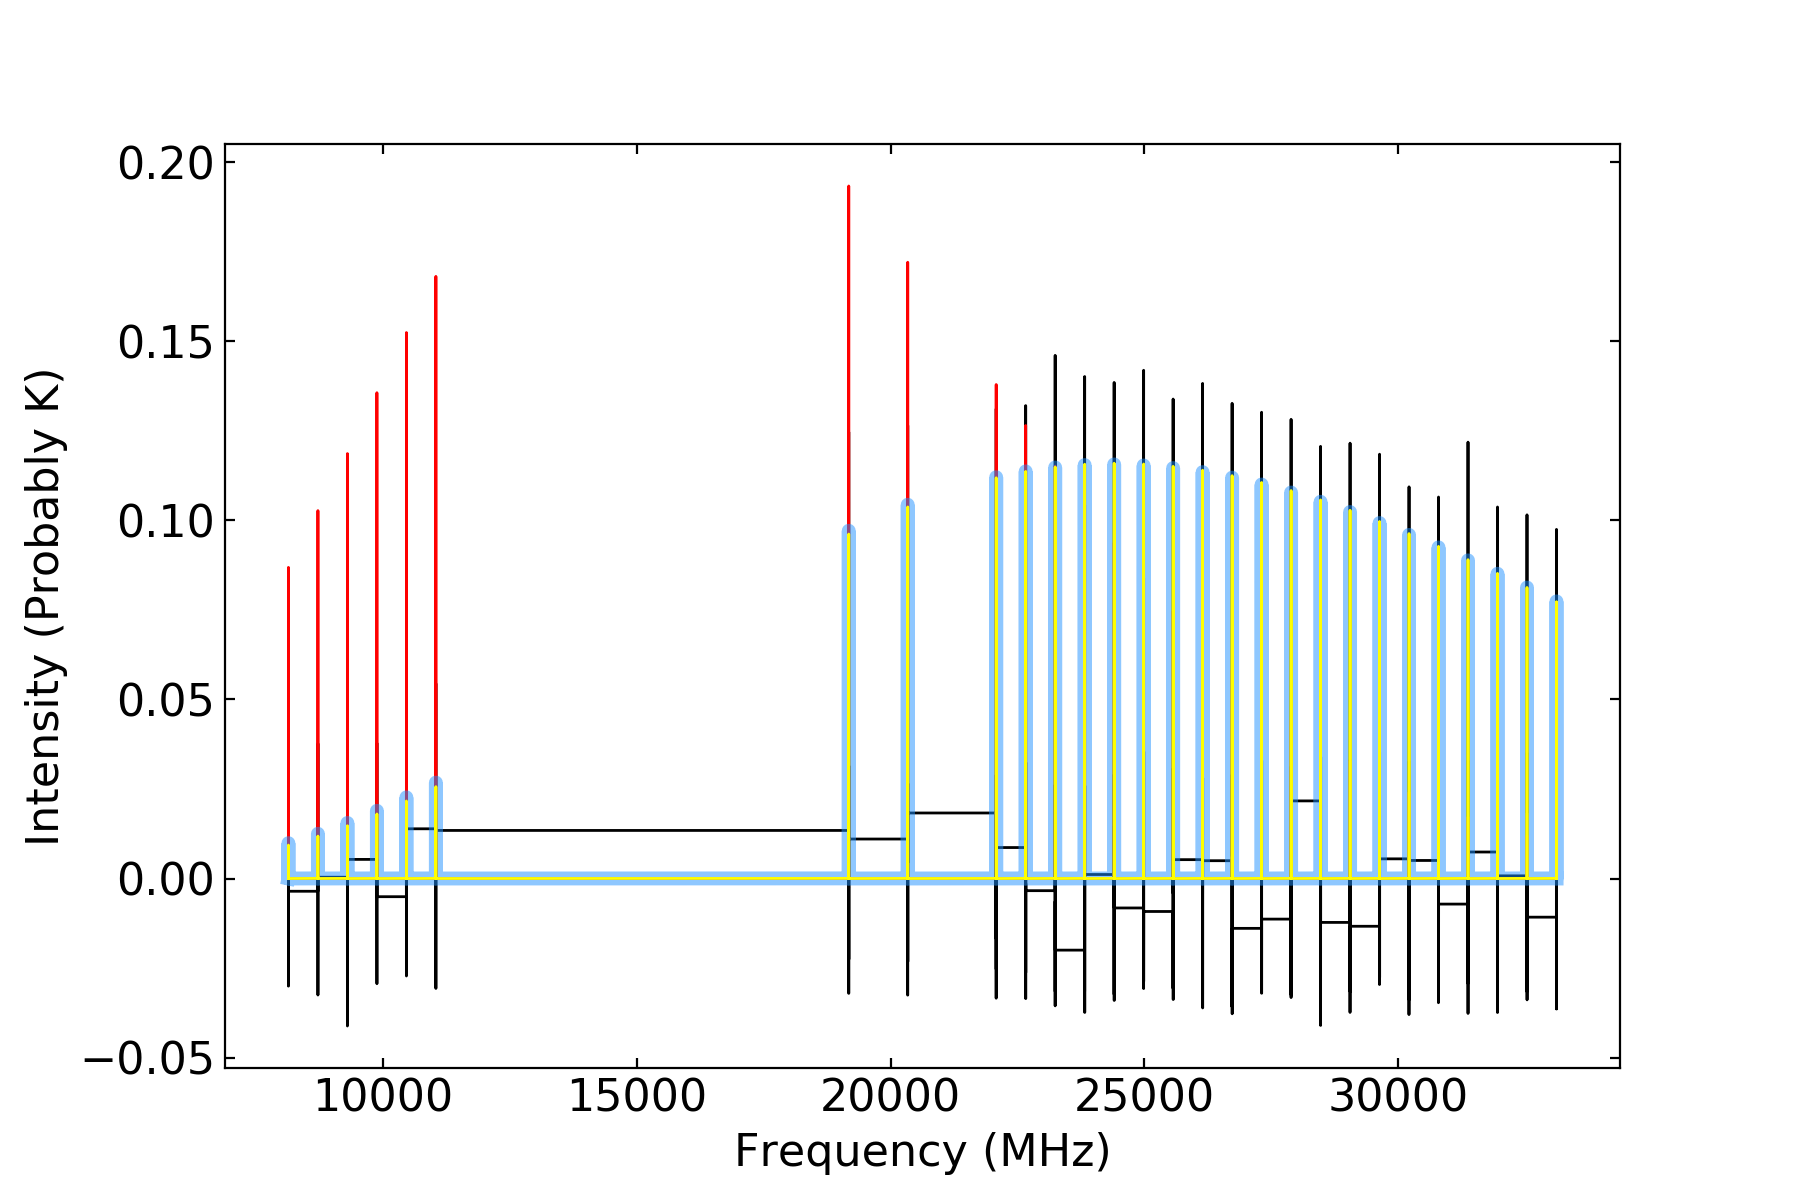

In [30]:
my_plot = Iplot(traces=[obs_tr,sim_i_tr,sim_t_tr,sim_f_tr])